# Data Structures in Python

This notebook demonstrates various data structures available in Python, including lists, tuples, sets, dictionaries, and more.


## Strings

- Creation: Strings can be defined using single quotes (' '), double quotes (" "), or triple quotes (''' ''' or """ """) for multi-line strings.

- **Immutability**: Once created, the characters in a string cannot be changed. Instead, operations on strings produce new strings.

- Indexing and Slicing: Like other sequences, you can access individual characters using indices (starting at 0) and extract parts of a string using slicing.

- Methods: Python provides many built-in methods to manipulate strings (e.g., .lower(), .upper(), .strip(), .replace(), and more).

- Concatenation and Formatting: Strings can be combined with the + operator, and formatted using f-strings (formatted string literals) or the format() method.

In [5]:
def can_be_equal_with_one_swap(s1, s2):
    if len(s1) != len(s2):
        return False
    
    # Find the indices where the characters differ
    diff = [(a, b) for a, b in zip(s1, s2) if a != b]
    
    # If there are no differences, the strings are already equal
    if not diff:
        return True
    
    # If there are exactly two differences, check if swapping them makes the strings equal
    if len(diff) == 2 and diff[0] == diff[1][::-1]:
        return True
    
    return False

s = "ban"
s2 = "bank"
# Test the function using the given variables s and s2
print(can_be_equal_with_one_swap(s, s2))  # Output: True

False


In [3]:
[(a, b) for a, b in zip(s, s2) if a != b]

[('b', 'k'), ('k', 'b')]

### One distance edit 

Given two strings s and t, return true if they are both one edit distance apart, otherwise return false.

A string s is said to be one distance apart from a string t if you can:

Insert exactly one character into s to get t.
Delete exactly one character from s to get t.
Replace exactly one character of s with a different character to get t.

In [20]:
def is_one_edit_distance(s: str, t: str) -> bool:
    # Early exit if length difference is more than 1
    if abs(len(s) - len(t)) > 1:
        return False

    # Ensure s is the shorter (or same length) string
    if len(s) > len(t):
        s, t = t, s

    i = j = 0
    found_difference = False

    while i < len(s) and j < len(t):
        if s[i] != t[j]:
            if found_difference:
                return False
            found_difference = True

            # If lengths differ, advance only the longer string pointer
            if len(s) < len(t):
                j += 1
                continue
        i += 1
        j += 1

    # If we’ve used up all of s but t has one extra char left, it’s still valid
    return found_difference or (len(t) - j == 1)

In [21]:
s = "ac"
t = "acb"

In [22]:
is_one_edit_distance(s, t)

True

### Palindrome

Given a string s, return true if a permutation of the string could form a palindrome and false otherwise.

In [162]:
s = "aabbcc" # -> "acbbca"

In [163]:
def can_form_palindrome(s: str) -> bool:
    freq = {}
    for char in s:
        freq[char] = freq.get(char, 0) + 1 #default value is 0

    odd_count = sum(1 for count in freq.values() if count % 2 != 0)
    return odd_count <= 1, freq

In [164]:
result, freq = can_form_palindrome(s)
freq,result

({'a': 2, 'b': 2, 'c': 2}, True)

In [170]:
def longest_palindromic_substring(s: str) -> str:
    """
    Returns the longest palindromic substring in s.
    The approach is to expand around each possible palindrome center.
    For each index i, we consider two cases:
      - Odd-length palindrome: center is at i.
      - Even-length palindrome: center is between i and i+1.
    We keep track of the longest palindrome found.
    
    Time Complexity: O(n^2) in the worst-case.
    Space Complexity: O(1) auxiliary space.
    """
    if not s:
        return ""
    
    def expand_around_center(left: int, right: int) -> str:
        while left >= 0 and right < len(s) and s[left] == s[right]:
            left -= 1
            right += 1
        return s[left + 1 : right]
    
    longest = ""
    for i in range(len(s)):
        # Odd-length palindrome
        odd = expand_around_center(i, i)
        # Even-length palindrome
        even = expand_around_center(i, i + 1)
        
        # Choose the longer one of the two
        candidate = odd if len(odd) > len(even) else even
        if len(candidate) > len(longest):
            longest = candidate
            
    return longest

# Example usage:
if __name__ == "__main__":
    s = "babad"
    print("Longest palindromic substring:", longest_palindromic_substring(s))
    # Expected output: "bab" or "aba"

0 0
1 1
0 2
2 2
1 3
3 3
4 4
Longest palindromic substring: bab


How many combinations is possible?

In [40]:
def generate_permutations(half, path, used, res):
    if len(path) == len(half):
        res.append(''.join(path))
        return
    for i in range(len(half)):
        if used[i]:
            continue
        # Skip duplicate characters
        if i > 0 and half[i] == half[i - 1] and not used[i - 1]:
            continue
        used[i] = True
        path.append(half[i])
        generate_permutations(half, path, used, res)
        path.pop()
        used[i] = False

def generate_palindromes(s: str):
    from collections import Counter
    count = Counter(s)
    mid = ""
    half = []
    
    # Check if more than one odd count character exists
    for ch, cnt in count.items():
        if cnt % 2 == 1:
            if mid:  # Already have one odd element
                return []
            mid = ch
        half.extend(ch * (cnt // 2)) # add half of the characters to the half list -> Counter({'a': 2, 'b': 2}) -> ['a', 'b']
    
    half = sorted(half)
    permutations = []
    used = [False] * len(half)
    generate_permutations(half, [], used, permutations)
    
    palindromes = []
    for perm in set(permutations):
        palindromes.append(perm + mid + perm[::-1])
    
    return palindromes

# Example usage:
if __name__ == "__main__":
    s1 = "aabb"
    s2 = "abaac"
    print("Input:", s1, "->", generate_palindromes(s1))
    print("Input:", s2, "->", generate_palindromes(s2))


Input: aabb -> ['abba', 'baab']
Input: abaac -> []


In [41]:
4//2

2

### Add Bold Tag in String Medium


You should add a closed pair of bold tag <b> and </b> to wrap the substrings in s that exist in words.

If two such substrings overlap, you should wrap them together with only one pair of closed bold-tag. If two substrings wrapped by bold tags are consecutive, you should combine them. Return s after adding the bold tags.


In [53]:
def addBoldTag(s: str, words) -> str:
    intervals = []
    # Find all intervals where any word is a substring of s.
    for word in words:
        start = s.find(word)
        while start != -1:
            intervals.append((start, start + len(word))) # if I found the word, I will add the start and end index to the intervals list
            start = s.find(word, start + 1)

    # If no intervals are found, return the string as is.
    if not intervals:
        return s

    # Sort intervals by start index.
    intervals.sort(key=lambda x: x[0])
    
    # Merge overlapping or consecutive intervals.
    merged = [intervals[0]]

    for curr in intervals[1:]:
        prev = merged[-1]
        # Check if intervals overlap or are adjacent.
        if curr[0] <= prev[1]:
            merged[-1] = (prev[0], max(prev[1], curr[1]))
        else:
            merged.append(curr)
    # Build the resulting string with bold tags.
    result = []
    prev_end = 0
    for start, end in merged:
        # Add text before current bold interval.
        result.append(s[prev_end:start])
        # Add bold tags around the interval.
        result.append("<b>" + s[start:end] + "</b>")
        prev_end = end
    # Append the remaining text after the last interval.
    result.append(s[prev_end:])
    
    return "".join(result)

# Example usage:
if __name__ == "__main__":
    s = "aaaaxyz123"
    words = ["aa", "123"]
    print(addBoldTag(s, words))  # Expected: "<b>abc</b>xyz<b>123</b>"

<b>aaaa</b>xyz<b>123</b>


In [158]:
def lengthOfLongestSubstring(s):
    """
    :type s: str
    :rtype: int
    """
    start = 0
    max_length = 0
    char_index_map = {}

    for i, char in enumerate(s):
        # If the character was seen before, and its last seen index is within the current window:
        if char in char_index_map and char_index_map[char] >= start:
            start = char_index_map[char] + 1
            
        char_index_map[char] = i
        print(char, start, i)
        max_length = max(max_length, i - start + 1)

    return max_length

In [161]:
# Example usage
s = "bbbcscsfbb"
print(lengthOfLongestSubstring(s))  # Output: 3

b 0 0
b 1 1
b 2 2
c 2 3
s 2 4
c 4 5
s 5 6
f 5 7
b 5 8
b 9 9
4


### Zigzag Conversion

In [177]:
def convert(s: str, numRows: int) -> str:
    if numRows == 1 or numRows >= len(s):
        return s

    # Create empty lists for each row.
    rows = [''] * numRows
    cur_row = 0
    going_down = False

    for char in s:
        rows[cur_row] += char
        # Change direction if we hit the top or bottom row.
        if cur_row == 0 or cur_row == numRows - 1:
            going_down = not going_down
        print(char, going_down, cur_row)
        cur_row += 1 if going_down else -1

    print(rows)
    # Concatenate all rows.
    return ''.join(rows)

# Example usage:
if __name__ == "__main__":
    s = "PAYPALISHIRING"
    numRows = 4
    print("Converted string:", convert(s, numRows))
    # Expected: "PINALSIGYAHRPI"

P True 0
A True 1
Y True 2
P False 3
A False 2
L False 1
I True 0
S True 1
H True 2
I False 3
R False 2
I False 1
N True 0
G True 1
['PIN', 'ALSIG', 'YAHR', 'PI']
Converted string: PINALSIGYAHRPI


### (atoi) 
The algorithm for myAtoi(string s) is as follows:

Whitespace: Ignore any leading whitespace (" "). Signedness: Determine the sign by checking if the next character is '-' or '+', assuming positivity if neither present. Conversion: Read the integer by skipping leading zeros until a non-digit character is encountered or the end of the string is reached. If no digits were read, then the result is 0. Rounding: If the integer is out of the 32-bit signed integer range [-231, 231 - 1], then round the integer to remain in the range. Specifically, integers less than -231 should be rounded to -231, and integers greater than 231 - 1 should be rounded to 231 - 1. Return the integer as the final result.

In [178]:
def myAtoi(s: str) -> int:
    """
    Converts the string s to a 32-bit signed integer according to the specification of the myAtoi function.
    
    Steps:
      1. Discard any leading whitespace.
      2. Check for an optional '+' or '-' sign to determine the sign.
      3. Read in digits until a non-digit is encountered.
      4. Convert the digits to an integer and apply the sign.
      5. Clamp the result to the 32-bit signed integer range [-2^31, 2^31 - 1].
    
    Time Complexity: O(n), where n is the length of the string.
    """
    INT_MAX = 2**31 - 1  # 2147483647
    INT_MIN = -2**31     # -2147483648
    
    i = 0
    n = len(s)
    
    # 1. Skip leading whitespace.
    while i < n and s[i] == ' ':
        i += 1

    # If string contains only whitespaces.
    if i == n:
        return 0
    
    # 2. Determine the sign.
    sign = 1
    if s[i] == '+':
        i += 1
    elif s[i] == '-':
        sign = -1
        i += 1
    
    # 3. Read digits and form the number.
    result = 0
    while i < n and s[i].isdigit():
        digit = int(s[i])
        
        # Check for overflow and clamp if necessary.
        if result > (INT_MAX - digit) // 10:
            return INT_MAX if sign == 1 else INT_MIN
        
        result = result * 10 + digit
        i += 1
    
    return sign * result

# Example usage:
if __name__ == "__main__":
    inputs = [
        "42",
        "   -42",
        "4193 with words",
        "words and 987",
        "-91283472332",
        "+1",
        "00000-42a1234"
    ]
    for s in inputs:
        print(f"myAtoi({s!r}) = {myAtoi(s)}")

myAtoi('42') = 42
myAtoi('   -42') = -42
myAtoi('4193 with words') = 4193
myAtoi('words and 987') = 0
myAtoi('-91283472332') = -2147483648
myAtoi('+1') = 1
myAtoi('00000-42a1234') = 0


### is valid number


^ → Matches the start of the string.

[+-]? → Optional leading sign character ('+' or '-').

((\d+(\.\d*)?)|(\.\d+)) → This part handles the numeric portion before any exponent: • (\d+(\.\d*)?) → One or more digits, optionally followed by: – a dot '.' and zero or more digits (e.g. "123", "123.", "123.45").

• (\.\d+) → A dot '.' followed by one or more digits (e.g. ".45").

([eE][+-]?\d+)? → An optional exponent part: • [eE] → The letter 'e' or 'E'.

• [+-]? → An optional '+' or '-' sign after 'e'/'E'.

• \d+ → One or more digits for the exponent.

$ → Matches the end of the string.


In a regular expression, “?” means “zero or one occurrences of the preceding pattern.” For example:

In [179]:
import re

def isNumber(s: str) -> bool:
    """
    Returns True if the given string s is a valid number according to the rules:
      1) An optional sign ('+' or '-').
      2) An integer or decimal number (with optional decimal point).
      3) An optional exponent part ('e' or 'E'), followed by an optional sign, then digits.
    """
    # Strip leading and trailing whitespace:
    s = s.strip()
    # Regex pattern explained:
    #   ^[+-]?               # sign
    #   (                    # group for number:
    #       (\d+(\.\d*)?)    # digits + optional decimal part (e.g. "123", "123.", "123.456")
    #       |(\.\d+)         # or a leading dot followed by digits (e.g. ".456")
    #   )
    #   (                    # optional exponent part:
    #      [eE][+-]?\d+      # 'e' or 'E', optional sign, digits
    #   )?
    #   $
    pattern = re.compile(r'^[+-]?((\d+(\.\d*)?)|(\.\d+))([eE][+-]?\d+)?$')
    return bool(pattern.match(s))

# Example usage:
if __name__ == "__main__":
    tests = ["0", "0089", "-0.1", "+3.14", "4.", "-.9", "2e10",
             "-90E3", "3e+7", "+6e-1", "53.5e93", "-123.456e789",
             "abc", "1a", "1e", "e3", "99e2.5", "--6", "-+3", "95a54e53"]
    for t in tests:
        print(f"{t!r} -> {isNumber(t)}")

'0' -> True
'0089' -> True
'-0.1' -> True
'+3.14' -> True
'4.' -> True
'-.9' -> True
'2e10' -> True
'-90E3' -> True
'3e+7' -> True
'+6e-1' -> True
'53.5e93' -> True
'-123.456e789' -> True
'abc' -> False
'1a' -> False
'1e' -> False
'e3' -> False
'99e2.5' -> False
'--6' -> False
'-+3' -> False
'95a54e53' -> False


In [181]:
def isNumber(s: str) -> bool:
    """
    Determines if the string s is a valid number without using regular expressions.
    Rules:
      1) Optional sign (+ or -)
      2) Integer or decimal part (allow "digits", ".digits", or "digits.")
      3) Optional exponent part (e or E, then optional sign, then digits)
    Returns True if s is a valid number, False otherwise.
    """
    s = s.strip()
    if not s:
        return False

    # Tracking variables
    i = 0
    n = len(s)

    # 1) Optional sign
    if s[i] in ['+', '-']:
        i += 1
        if i == n:
            return False  # string was just '+' or '-'

    found_digit = False
    found_dot = False
    found_exp = False

    while i < n:
        ch = s[i]

        if ch.isdigit():
            found_digit = True
            i += 1
        elif ch == '.':
            # Decimal point can appear only once and cannot appear after exponent
            if found_dot or found_exp:
                return False
            found_dot = True
            i += 1
        elif ch in ['e', 'E']:
            # Exponent can appear only once, must have at least one digit before it
            if found_exp or not found_digit:
                return False
            found_exp = True
            i += 1

            # After 'e' or 'E', check optional sign
            if i < n and s[i] in ['+', '-']:
                i += 1
            # Must have digits after 'e' or 'E'
            exp_digits = False
            while i < n and s[i].isdigit():
                exp_digits = True
                i += 1
            if not exp_digits:
                return False
        else:
            # Invalid character
            return False

    # If we exit the loop, we must have at least one digit somewhere
    return found_digit

# Example usage:
if __name__ == "__main__":
    tests = [
        "0", "0089", "-0.1", "+3.14", "4.", "-.9", "2e10",
        "-90E3", "3e+7", "+6e-1", "53.5e93", "-123.456e789",
        "abc", "1a", "1e", "e3", "99e2.5", "--6", "-+3", "95a54e53", "."
    ]
    for t in tests:
        print(f"{t!r} -> {isNumber(t)}")

'0' -> True
'0089' -> True
'-0.1' -> True
'+3.14' -> True
'4.' -> True
'-.9' -> True
'2e10' -> True
'-90E3' -> True
'3e+7' -> True
'+6e-1' -> True
'53.5e93' -> True
'-123.456e789' -> True
'abc' -> False
'1a' -> False
'1e' -> False
'e3' -> False
'99e2.5' -> False
'--6' -> False
'-+3' -> False
'95a54e53' -> False
'.' -> False


### Basic Calculator II

In [378]:
import math
def calculate(s: str) -> int:
    s = s.replace(" ", "")
    stack = []
    num = 0
    op = '+'
    
    for i, ch in enumerate(s):
        if ch.isdigit():
            num = num * 10 + int(ch) # as the number increases, we multiply by 10 and add the new digit
        # if the character is an operator or last character
        if not ch.isdigit() or i == len(s) - 1:
            if op == '+':
                stack.append(num)
            elif op == '-':
                stack.append(-num)
            elif op == '*':
                stack[-1] = stack[-1] * num
            elif op == '/':
                # truncate division toward zero
                stack[-1] = math.ceil(stack[-1] / num)
            op = ch
            num = 0
    print(stack)       
    return sum(stack)

# Example usage:
if __name__ == "__main__":
    expression = "14-3/2"
    print(calculate(expression))  # Output: 7

[14, -1]
13


### Valid Palindrome


A phrase is a palindrome if, after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters, it reads the same forward and backward. Alphanumeric characters include letters and numbers.

Input: s = "A man, a plan, a canal: Panama"

Output: true

Explanation: "amanaplanacanalpanama" is a palindrome.




In [191]:
'''
Both ways are O(n) in time complexity, but the two-pointer loop is more memory efficient since it does not build a reversed copy of the string.
In practice, either method should be fast enough, but the while loop avoids allocating additional memory for the reversed string.
'''

'\nBoth ways are O(n) in time complexity, but the two-pointer loop is more memory efficient since it does not build a reversed copy of the string.\nIn practice, either method should be fast enough, but the while loop avoids allocating additional memory for the reversed string.\n'

In [190]:
def is_palindrome(s: str) -> bool:
    """
    Checks if s is a palindrome by:
      1) Converting all uppercase letters to lowercase
      2) Removing all non-alphanumeric characters
      3) Checking if the resulting string reads the same forward and backward
    """
    # Filter out non-alphanumeric and convert to lowercase
    filtered = [ch.lower() for ch in s if ch.isalnum()]
    print("".join(filtered))
    print("".join(filtered[::-1]))
    # Two-pointer check
    left, right = 0, len(filtered) - 1
    while left < right:
        if filtered[left] != filtered[right]:
            return False
        left += 1
        right -= 1
    return True

# Example usage:
if __name__ == "__main__":
    print(is_palindrome("A man, a plan, a canal: Panama"))  # True
    print(is_palindrome("race a car"))  # False

amanaplanacanalpanama
amanaplanacanalpanama
True
raceacar
racaecar
False


### Is valid string

In [ ]:
def is_valid(s):
    stack = []
    mapping = {")": "(", "}": "{", "]": "["}
    
    for char in s:
        if char in mapping:
            top_element = stack.pop() if stack else '#'
            if mapping[char] != top_element:
                return False
        else:
            stack.append(char)
    
    print(stack)
    return not stack

# Example usage
s = "(())"
print(is_valid(s))  # Output: False

### Expression Add Operators

In [380]:
def addOperators(num: str, target: int):
    res = []
    
    def backtrack(index, path, evaluated, multed):
        # base case: if we've reached the end of num
        if index == len(num):
            if evaluated == target:
                res.append(path)
            return
        
        for i in range(index, len(num)):
            # avoid numbers with leading zeros
            if i != index and num[index] == '0':
                break
            cur_str = num[index:i+1]
            print(cur_str)
            cur = int(cur_str)
            if index == 0:
                # first number, pick it without any operator.
                backtrack(i+1, cur_str, cur, cur)
            else:
                # Addition
                backtrack(i+1, path + "+" + cur_str, evaluated + cur, cur)
                # Subtraction
                backtrack(i+1, path + "-" + cur_str, evaluated - cur, -cur)
                # Multiplication
                backtrack(i+1, path + "*" + cur_str, evaluated - multed + multed * cur, multed * cur)
                
    backtrack(0, "", 0, 0)
    return res

# Example usage:
if __name__ == "__main__":
    num = "123"
    target = 6
    print(addOperators(num, target))
    # Expected output: ["1+2+3", "1*2*3"]

1
2
3
3
3
23
12
3
123
['1+2+3', '1*2*3']


### Remove Invalid Parentheses

Given a string s that contains parentheses and letters, remove the minimum number of invalid parentheses to make the input string valid.

Return a list of unique strings that are valid with the minimum number of removals. You may return the answer in any order.



In [389]:
def removeInvalidParentheses(s: str):
    def isValid(string: str) -> bool:
        count = 0
        for char in string:
            if char == '(':
                count += 1
            elif char == ')':
                count -= 1
                if count < 0:
                    return False
        return count == 0

    level = {s}
    while True:
        valid = list(filter(isValid, level))
        print(valid)
        if valid:
            return valid
        next_level = set()
        for expr in level:
            for i in range(len(expr)):
                if expr[i] not in ('(', ')'):
                    continue
                next_expr = expr[:i] + expr[i+1:]
                print(next_expr, i)
                next_level.add(next_expr)
        level = next_level

# Example usage:
if __name__ == "__main__":
    s = "(a)())()"
    print(removeInvalidParentheses(s))
    # Expected output: ["(a)()()", "(a())()"]

[]
a)())() 0
(a())() 2
(a)))() 3
(a)()() 4
(a)()() 5
(a)())) 6
(a)())( 7
['(a)()()', '(a())()']
['(a)()()', '(a())()']


## List

A list is a collection which is ordered and changeable. Allows duplicate members.


Sets and lists both have their own advantages. 

- Sets are optimal when you need fast membership testing and uniqueness, as they offer average O(1) lookup time and automatically eliminate duplicate values. 

- In contrast, lists preserve order and allow duplicates, making them ideal when the sequence of elements matters. The choice depends on your specific needs in terms of order, performance, and uniqueness requirements.



- Lists support indexing and slicing to access individual items or sublists.
- They are mutable, allowing modifications such as element assignment.
- You can concatenate lists with the + operator and repeat them using the * operator.
- Built-in methods like append(), insert(), remove(), pop(), reverse(), and sort() facilitate common list operations.
- Lists can contain mixed data types, including other lists (nested lists).
- List comprehensions provide a concise way to generate new lists based on existing iterables.


In [66]:
# Let's perform some common list operations.
# Here, we are using the pre-defined list "words" which is ['aa', '123'].

words = ['aa', '123']

# Create a copy of words to work with
ops_list = words.copy()
print("Initial list:", ops_list)

# Append a new element
ops_list.append("new")
print("After append:", ops_list)

# Insert an element at index 1
ops_list.insert(1, "inserted")
print("After insert at index 1:", ops_list)

# Remove an element (first occurrence) 
ops_list.remove("aa")
print("After removing 'aa':", ops_list)

# Pop an element from the end
popped = ops_list.pop()
print("Popped element:", popped)
print("List after pop:", ops_list)

# Reverse the list in-place
ops_list.reverse()
print("After reverse:", ops_list)

# Sort the list (alphabetically)
ops_list.sort()
print("After sorting:", ops_list)

Initial list: ['aa', '123']
After append: ['aa', '123', 'new']
After insert at index 1: ['aa', 'inserted', '123', 'new']
After removing 'aa': ['inserted', '123', 'new']
Popped element: new
List after pop: ['inserted', '123']
After reverse: ['123', 'inserted']
After sorting: ['123', 'inserted']


In [98]:
# Creating a list
my_list = [1, 2, 3, 4, 5]
print("List:", my_list)

# Accessing elements
print("First element:", my_list[0])

# Modifying elements
my_list[2] = 10
print("Modified list:", my_list)

my_list.append(6)
print("Appended list:", my_list)

my_list.insert(2, 7)
print("Inserted list:", my_list)

my_list.remove(7)
print("Removed list:", my_list)

my_list.pop(2)
print("Popped list index 2:", my_list)  

my_list.pop()
print("Popped list:", my_list)  

my_list.reverse()
print("Reversed list:", my_list)

my_list.sort(key=None, reverse=False)
print("Sorted list:", my_list)

print("Count of 5:", my_list.count(5))


print("Index of 5:", my_list.index(5))


#my_list.clear()

print(my_list)

List: [1, 2, 3, 4, 5]
First element: 1
Modified list: [1, 2, 10, 4, 5]
Appended list: [1, 2, 10, 4, 5, 6]
Inserted list: [1, 2, 7, 10, 4, 5, 6]
Removed list: [1, 2, 10, 4, 5, 6]
Popped list index 2: [1, 2, 4, 5, 6]
Popped list: [1, 2, 4, 5]
Reversed list: [5, 4, 2, 1]
Sorted list: [1, 2, 4, 5]
Count of 5: 1
Index of 5: 3
[1, 2, 4, 5]


In the worst case, if you need to insert an element at the beginning or in the middle of the array, you may have to shift other elements to make space for the new element, which takes O(n) time (where n is the number of elements in the array).

In [100]:
my_list.insert(2, 10)  # Insert 10 at index 2

print(my_list)  # Output: [1, 2, 10, 3, 4, 5]


[1, 2, 10, 10, 4, 5]


### Find complement of a number in a list

In [70]:
def twoSum(nums, target):
    # Dictionary to store the value and its corresponding index
    num_map = {}
    
    # Iterate over the nums array
    for i, num in enumerate(nums):
        complement = target - num
        
        # If the complement exists in the dictionary, return the indices
        if complement in num_map:
            return [num_map[complement], i]
        
        # Otherwise, add the current number and its index to the dictionary
        num_map[num] = i


## Nested List

Multi-Level Structure:
Each element of a nested list can be another list, and those lists can contain further nested lists, creating multiple layers of data.

Accessing Elements:
To access an element, you need to use multiple indices. For example, in a 2-dimensional nested list (a matrix), you use the first index for the row and the second index for the column.

Common Use Cases:
Nested lists are often used to represent:

Matrices (2D arrays)
Grids (like a chess board)
Trees and other hierarchical data structures


- O(1)




In [73]:
MyList = [[22, 14, 16], ["Joe", "Sam", "Abel"], [True, False, True]]

In [74]:
for objects in MyList:
    print(id(objects))

4666742976
4666114880
4666336064


In [75]:
MyList = [[]] * 5

In [76]:
MyList[1].append(7)
print(MyList)

[[7], [7], [7], [7], [7]]


### Copy List with Random Pointer



A linked list of length n is given such that each node contains an additional random pointer, which could point to any node in the list, or null.

Construct a deep copy of the list. The deep copy should consist of exactly n brand new nodes, where each new node has its value set to the value of its corresponding original node. Both the next and random pointer of the new nodes should point to new nodes in the copied list such that the pointers in the original list and copied list represent the same list state. None of the pointers in the new list should point to nodes in the original list.

For example, if there are two nodes X and Y in the original list, where X.random --> Y, then for the corresponding two nodes x and y in the copied list, x.random --> y.

Return the head of the copied linked list.

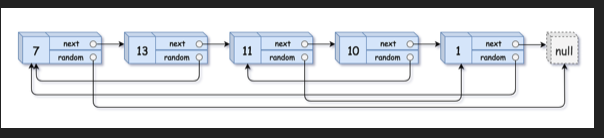

Input: head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
Output: [[7,null],[13,0],[11,4],[10,2],[1,0]]

In [222]:
# Definition for a Node.
class Node:
    def __init__(self, val: int, next: 'Node' = None, random: 'Node' = None):
        self.val = val
        self.next = next
        self.random = random

def copyRandomList(head: 'Node') -> 'Node':
    """
    Creates a deep copy of a linked list where each node has an additional random pointer.
    
    Approach (Interleaving method):
      1. For each node in the original list, create a new node and insert it right after the original one.
      2. Set the random pointers for the newly created nodes:
         new_node.random = original_node.random.next if original_node.random exists.
      3. Restore the original list, and extract the copied list.
    """
    if not head:
        return None

    # Step 1: Create new nodes interleaved with the original nodes.
    current = head
    while current:
        new_node = Node(current.val, current.next)
        current.next = new_node
        current = new_node.next

    # Step 2: Assign random pointers for the new nodes.
    current = head
    while current:
        if current.random:
            current.next.random = current.random.next
        current = current.next.next

    # Step 3: Separate the original list and the copied list.
    current = head
    copy_head = head.next
    while current:
        copy = current.next
        current.next = copy.next  # restore original list pointer
        copy.next = copy.next.next if copy.next else None
        current = current.next

    return copy_head

# Helper function to print the list for debugging.
def print_list(head: Node):
    nodes = []
    while head:
        random_val = head.random.val if head.random else None
        nodes.append(f"[{head.val}, random:{random_val}]")
        head = head.next
    print(" -> ".join(nodes))



In [214]:
# head = [[7,null],[13,0],[11,4],[10,2],[1,0]]
nodes = [Node(7), Node(13), Node(11), Node(10), Node(1)]
# Setup next pointers:
for i in range(len(nodes)-1):
    nodes[i].next = nodes[i+1]

# Setup random pointers using indices
# Node0: random: None
nodes[1].random = nodes[0]   # 13 -> 7
nodes[2].random = nodes[4]   # 11 -> 1
nodes[3].random = nodes[2]   # 10 -> 11
nodes[4].random = nodes[0]   # 1 -> 7

In [215]:
original_head = nodes[0]
copied_head = copyRandomList(original_head)

Explanation
Interleaving New Nodes:

We iterate through the original list. For each original node, we create a new node with the same value and insert it right after the original node.
After this pass, the list will look like:
original1 → new1 → original2 → new2 → ...
Setting Random Pointers:

In the interleaved list, if the original node’s random pointer is non-null, then the new node’s random pointer should point to original.random.next.
This works because the new copy of a node appears immediately after the original node in the interleaved list.
Restoring the Original and Extracting the Copy:

We traverse the interleaved list again. For each original node, we extract its corresponding new node and restore the original node’s next pointer.
This effectively separates the copied list from the original list.
Output:

The function returns the head of the deep-copied list.
This method runs in O(n) time with O(1) extra space (excluding the space for the new nodes) and provides a clean solution to the "Copy List with Random Pointer" problem.

## Set
A set is a collection which is unordered, unchangeable*, and unindexed. No duplicate members.


- Uniqueness:
    Sets automatically remove duplicates. Every element in a set is unique.

- Unordered:
    Elements in a set do not have a fixed order. Display order may vary and does not reflect insertion order (prior to Python 3.7, though insertion order is preserved in regular dictionaries and sets in CPython 3.7+, it's not a guaranteed language feature).

- Mutable:
    You can add or remove elements after a set is created. However, the elements themselves must be immutable (e.g., numbers, strings, tuples).

- Efficient Membership Testing:
    Checking if an element is in a set is very fast (average O(1) time complexity).

- Set Operations:
    Sets provide mathematical operations like union, intersection, difference, and symmetric difference:

union(set2) or set1 | set2

intersection(set2) or set1 & set2

difference(set2) or set1 - set2

symmetric_difference(set2) or set1 ^ set2

In [77]:
my_set = {1, 2, 3, 4, 5}
print("Set:", my_set)

my_set.add(6)
print("Set after adding an element:", my_set)

my_set.remove(3)
print("Set after removing an element:", my_set)

Set: {1, 2, 3, 4, 5}
Set after adding an element: {1, 2, 3, 4, 5, 6}
Set after removing an element: {1, 2, 4, 5, 6}


In [78]:
# Creating a set with duplicate elements - the duplicates are removed
my_set = {1, 2, 2, 3, 4, 3}
print(my_set)  # Output might be: {1, 2, 3, 4}

# Adding and removing elements
my_set.add(5)        # Now my_set is {1, 2, 3, 4, 5}
my_set.remove(3)     # Removes element 3 if it exists

# Checking membership (fast lookup)
if 2 in my_set:
    print("2 is in my_set")

# Set operations
set_a = {1, 2, 3}
set_b = {3, 4, 5}

# Union
print(set_a | set_b)  # Output: {1, 2, 3, 4, 5}

# Intersection
print(set_a & set_b)  # Output: {3}

# Difference
print(set_a - set_b)  # Output: {1, 2}

# Symmetric Difference
print(set_a ^ set_b)  # Output: {1, 2, 4, 5}

{1, 2, 3, 4}
2 is in my_set
{1, 2, 3, 4, 5}
{3}
{1, 2}
{1, 2, 4, 5}


## Tuple
A tuple is a collection which is ordered and unchangeable. Allows duplicate members.

- immutable: dont support in-place mutations
- lightweight
- Heterogeneous: They can store objects of different data types and domains, including mutable objects.
- Nestable: They can contain other tuples, so you can have tuples of tuples.
- Iterable: They support iteration, so you can traverse them using a loop or comprehension while you perform operations with each of their elements.
- Sliceable: They support slicing operations, meaning that you can extract a series of elements from a tuple.
- Combinable: They support concatenation operations, so you can combine two or more tuples using the concatenation operators, which creates a new tuple.
- Hashable: They can work as keys in dictionaries when all the tuple items are immutable.


- augmented conct operator works
- + operator works
- repeating with *



In [79]:
# To create a tuple with a single item, you need to place the item followed by a comma

one_number = (43,)
one_number

(43,)

In [80]:
one_number.count(43)

1

In [82]:
one_number[1] = "new"

TypeError: 'tuple' object does not support item assignment

In [81]:
tuple(["Pythonista"])


('Pythonista',)

In [82]:
numbers = (1, 2, 3, 4, 5)
first, *middle, last = numbers

middle

[2, 3, 4]

In [92]:
numbers[::-1]

(5, 4, 3, 2, 1)

In [83]:
from copy import copy, deepcopy
student_info = ("Linda", 18, ["Math", "Physics", "History"])
student_profile = copy(student_info)

id(student_info) == id(student_profile)

True

In [84]:
student_profile_deep = deepcopy(student_info)
id(student_profile_deep) == id(student_profile)

False

### Count valid pairs with equal products

In [96]:
from collections import defaultdict

def countTuples(nums):
    product_pairs = {} # or with defaultdict: product_pairs = defaultdict(int)
    n = len(nums)
    
    # Count pairs by product (only unique pairs since nums has distinct elements)
    for i in range(n):
        for j in range(i+1, n): # to avoid duplicates
            product_pairs[nums[i] * nums[j]] = product_pairs.get(nums[i] * nums[j], 0) + 1 #default value is 0
            #product_pairs.get([nums[i] * nums[j]]) += 1

    total = 0
    # For each product, if there are k pairs, we can form 8 * (k choose 2) valid tuples -> binomial coefficient
    for count in product_pairs.values():
        if count >= 2:
            total += 8 * (count * (count - 1) // 2)
    return total, product_pairs

# Example usage:
nums_ex = [2, 3, 4, 6]
print("Number of valid tuples:", countTuples(nums_ex))

Number of valid tuples: (8, {6: 1, 8: 1, 12: 2, 18: 1, 24: 1})


## Hashable Obj

- A hashable object is an object that has a hash value that never changes during its lifetime

print("Immutable object's hash value:")
print("hash(cnt):", hash(cnt))
print("hash(s):", hash(s))


In [97]:
print("Hashing a mutable object like MyList raises an error:")
try:
    print(hash(MyList))
except TypeError as e:
    print("Error hashing MyList:", e)

Hashing a mutable object like MyList raises an error:
Error hashing MyList: unhashable type: 'list'


## Stack

A stack is a collection which follows the Last In First Out (LIFO) principle.

- Supports push (insertion), pop (removal), and peek (inspect top element) operations.
- Typically implemented in Python using a list with O(1) time complexity for push and pop.
- Follows a Last In First Out (LIFO) principle, making the most recently added item the first to be removed.
- Commonly used in recursion, backtracking, and expression evaluation.
- Can be extended to include utility functions such as isEmpty and size.


In [101]:

stack = []
stack.append(1)
stack.append(2)
stack.append(3)
print("Stack:", stack)

# Popping elements
print("Popped element:", stack.pop())
print("Stack after popping an element:", stack)


Stack: [1, 2, 3]
Popped element: 3
Stack after popping an element: [1, 2]


#### Valid parameters

Given a string s containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

- Open brackets must be closed by the same type of brackets.
- Open brackets must be closed in the correct order.
- Every close bracket has a corresponding open bracket of the same type.




In [107]:
def isValid(s: str) -> bool:
    # Mapping of closing brackets to their corresponding opening brackets.
    bracket_map = {')': '(', '}': '{', ']': '['}
    stack = []
    
    for char in s:
        if char in bracket_map.values():
            # If it's an opening bracket, push it onto the stack.
            stack.append(char)
        elif char in bracket_map:
            # If it's a closing bracket, check for a matching opening bracket.
            if not stack or stack.pop() != bracket_map[char]:
                return False
        else:
            # In case there are any other characters, they can be ignored or handled.
            return False
            
    # At the end, the stack should be empty if all brackets matched.
    return not stack

In [108]:
# Example usage:
if __name__ == "__main__":
    test_strings = [
        "()",           # True
        "()[]{}",       # True
        "(]",           # False
        "([)]",         # False
        "{[]}",         # True
        ".",             # True (an empty string is valid)
    ]

    for s in test_strings:
        print(f"{s!r}: {isValid(s)}")

'()': True
'()[]{}': True
'(]': False
'([)]': False
'{[]}': True
'.': False


#### Longest Valid Parentheses

Given a string containing just the characters '(' and ')', return the length of the longest valid (well-formed) parentheses 
substring


In [109]:
def longestValidParentheses(s: str) -> int:
    max_length = 0
    # Initialize stack with -1 to help with length calculations
    stack = [-1]
    
    for i, char in enumerate(s):
        if char == '(':
            stack.append(i)
        else:  # char == ')'
            # Pop from the stack
            stack.pop()
            # If stack is empty, push current index; else update max_length
            if not stack:
                stack.append(i)
            else:
                max_length = max(max_length, i - stack[-1])
    return max_length

# Test the function using the existing variable s
s = "(((())"
print(longestValidParentheses(s))



4


#### Trapping Rain Water

Given n non-negative integers representing an elevation map where the width of each bar is 1, compute how much water it can trap after raining.

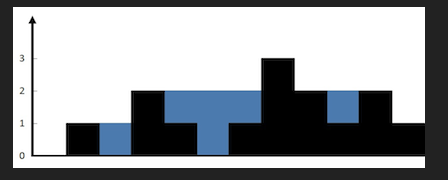

In [116]:
def trap(height):
    if not height:
        return 0

    left, right = 0, len(height) - 1
    left_max, right_max = height[left], height[right]
    water = 0

    while left < right:
        
        if left_max < right_max:
            left += 1
            left_max = max(left_max, height[left])
            water += left_max - height[left]
        else:
            right -= 1
            right_max = max(right_max, height[right])
            water += right_max - height[right]
    return water

# Example usage:
elevation = [0,1,0,2,1,0,1,3,2,1,2,1]
print("Trapped water:", trap(elevation))

Trapped water: 6


### Simplify path

In [117]:

def simplify_path(path):
    # Split the path by '/' to process each part
    parts = path.split('/')
    print(parts)
    stack_path = []
    
    for part in parts:
        if part == '' or part == '.':
            # Skip empty parts and current directory tokens
            continue
        elif part == '..':
            # Go up to the parent directory if possible
            if stack_path:
                stack_path.pop()
        else:
            # Normal directory/file names (e.g., '...' is valid)
            stack_path.append(part)
    
    # Assemble the canonical path. Root is '/' if no parts remain.
    return '/' + '/'.join(stack_path)

# Use the given variable s as the input path


s = "/home//user/Documents/../Pictures"
canonical_path = simplify_path(s)
print(canonical_path)

    
    
    

['', 'home', '', 'user', 'Documents', '..', 'Pictures']
['home', 'user', 'Documents']
/home/user/Pictures


### Max Histogram area

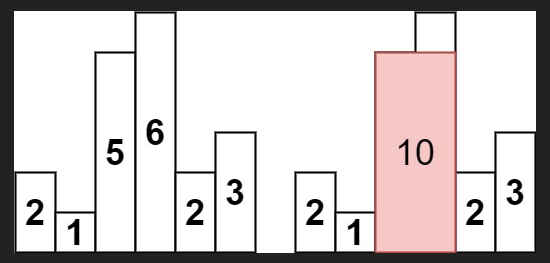



In [127]:
def largestRectangleArea(heights):
    stack = []
    max_area = 0
    # Append a zero height to force calculation of remaining bars
    heights.append(0)
    
    for i, h in enumerate(heights):
        while stack and h < heights[stack[-1]]:
            height = heights[stack.pop()]
            width = i if not stack else i - stack[-1] - 1
            max_area = max(max_area, height * width)
        stack.append(i)
    
    # Restore the original list if necessary
    heights.pop()
    print("Largest rectangle area:", max_area)

    return max_area


In [128]:
heights = [2,1,5,6,2,3]
largestRectangleArea(heights)

Largest rectangle area: 10


10

### Matrix

Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

In [135]:
matrix = [["1","0","1","0","0"],["1","0","1","1","1"],["1","1","1","1","1"],["0","0","0","0","0"]]

In [136]:
def largestRectangleAreaHistogram(heights):
    stack = []
    max_area = 0
    # Append a sentinel value
    for i, h in enumerate(heights + [0]):
        while stack and h < heights[stack[-1]]:
            height = heights[stack.pop()]
            width = i if not stack else i - stack[-1] - 1
            max_area = max(max_area, height * width)
        stack.append(i)
    return max_area

def maximalRectangle(matrix):
    if not matrix or not matrix[0]:
        return 0
    
    max_area = 0
    n = len(matrix[0])
    heights = [0] * n
    
    for row in matrix:
        for j in range(n):
            # Convert string values to integers for calculation
            heights[j] = heights[j] + 1 if row[j] == '1' else 0
        max_area = max(max_area, largestRectangleAreaHistogram(heights))
    return max_area

# Test with the pre-defined 'matrix' variable
area = maximalRectangle(matrix)
print("The area of the largest rectangle is:", area)


The area of the largest rectangle is: 6


### Max Stack


Design a max stack data structure that supports the stack operations and supports finding the stack's maximum element.


MaxStack() Initializes the stack object.
void push(int x) Pushes element x onto the stack.
int pop() Removes the element on top of the stack and returns it.
int top() Gets the element on the top of the stack without removing it.
int peekMax() Retrieves the maximum element in the stack without removing it.
int popMax() Retrieves the maximum element in the stack and removes it. If there is more than one maximum element, only remove the top-most one.
You must come up with a solution that supports O(1) for each top call and O(logn) for each other call.

 

Example 1:

Input
["MaxStack", "push", "push", "push", "top", "popMax", "top", "peekMax", "pop", "top"]
[[], [5], [1], [5], [], [], [], [], [], []]

In [138]:
import bisect

# Doubly linked list node.
class Node:
    def __init__(self, val: int):
        self.val = val
        self.prev = None
        self.next = None

class MaxStack:
    def __init__(self):
        # Initialize dummy head and tail to form our doubly linked list.
        self.head = Node(0)
        self.tail = Node(0)
        self.head.next = self.tail
        self.tail.prev = self.head
        
        # Dictionary mapping each value to the list of nodes (instances) with that value.
        self.val_to_nodes = {}
        
        # A sorted list of the unique keys currently in the stack.
        self.sorted_keys = []
        
    def push(self, x: int) -> None:
        # Create a new node.
        node = Node(x)
        # Append to the tail (stack's top) of the doubly linked list.
        node.prev = self.tail.prev
        node.next = self.tail
        self.tail.prev.next = node
        self.tail.prev = node
        
        # Add node to our dictionary.
        if x in self.val_to_nodes:
            self.val_to_nodes[x].append(node)
        else:
            self.val_to_nodes[x] = [node]
            # Insert x in sorted order.
            bisect.insort(self.sorted_keys, x)
    
    def pop(self) -> int:
        # Remove and return the top element.
        if self.head.next == self.tail:
            return None  # Empty stack.
        node = self.tail.prev
        self._remove_from_linked_list(node)
        
        # Remove node from dictionary.
        nodes_list = self.val_to_nodes[node.val]
        for i, n in enumerate(nodes_list):
            if n is node:
                nodes_list.pop(i)
                break
        # If no more nodes with this value, remove the key.
        if not nodes_list:
            idx = bisect.bisect_left(self.sorted_keys, node.val)
            self.sorted_keys.pop(idx)
            del self.val_to_nodes[node.val]
        return node.val
    
    def top(self) -> int:
        # Return the value at the top of the stack.
        return self.tail.prev.val if self.head.next != self.tail else None
    
    def peekMax(self) -> int:
        # The max is the last element in our sorted keys.
        return self.sorted_keys[-1] if self.sorted_keys else None
    
    def popMax(self) -> int:
        # Retrieve and remove the most recently pushed node of the maximum value.
        if not self.sorted_keys:
            return None
        max_val = self.sorted_keys[-1]
        nodes_list = self.val_to_nodes[max_val]
        node = nodes_list.pop()  # Pop the most recent node with max_val.
        self._remove_from_linked_list(node)
        if not nodes_list:
            self.sorted_keys.pop()  # Remove max_val from sorted_keys.
            del self.val_to_nodes[max_val]
        return max_val
    
    def _remove_from_linked_list(self, node: Node) -> None:
        # Remove node from doubly linked list.
        node.prev.next = node.next
        node.next.prev = node.prev

# Example usage:
if __name__ == "__main__":
    stk = MaxStack()
    stk.push(5)   # Stack: [5]
    stk.push(1)   # Stack: [5, 1]
    stk.push(5)   # Stack: [5, 1, 5]
    print("Top:", stk.top())         # Should print 5
    print("popMax:", stk.popMax())     # Removes the top-most max (5) -> returns 5
    print("Top after popMax:", stk.top())  # Now top is 1
    print("peekMax:", stk.peekMax())   # Should be 5 (remaining maximum)
    print("Pop:", stk.pop())           # Removes 1 -> returns 1
    print("Top:", stk.top())           # Now top returns 5

Top: 5
popMax: 5
Top after popMax: 1
peekMax: 5
Pop: 1
Top: 5


## Queue

A queue is a collection which follows the First In First Out (FIFO) principle.

- Follows the First In First Out (FIFO) principle where the first element added is the first to be removed.
- Uses operations such as enqueue (adding elements) and dequeue (removing elements).
- Typically implemented using collections.deque for efficient O(1) time complexity on both operations.
- Ideal for scenarios like task scheduling, buffering, and breadth-first traversal in algorithms.



In [139]:

from collections import deque

# Creating a queue
queue = deque([1, 2, 3])
print("Queue:", queue)

# Adding elements
queue.append(4)
print("Queue after adding an element:", queue)

# Removing elements
print("Removed element:", queue.popleft())
print("Queue after removing an element:", queue)

Queue: deque([1, 2, 3])
Queue after adding an element: deque([1, 2, 3, 4])
Removed element: 1
Queue after removing an element: deque([2, 3, 4])


### Implement Stack using Queues

In [140]:
from collections import deque

class MyStack:
    def __init__(self):
        # Two queues used to simulate stack operations
        self.q1 = deque()
        self.q2 = deque()

    def push(self, x: int) -> None:
        # Always push to q2 first
        self.q2.append(x)
        # Move all elements from q1 to q2
        while self.q1:
            self.q2.append(self.q1.popleft())
        # Swap the names so q1 has the new top
        self.q1, self.q2 = self.q2, self.q1

    def pop(self) -> int:
        return self.q1.popleft() if not self.empty() else None

    def top(self) -> int:
        return self.q1[0] if not self.empty() else None

    def empty(self) -> bool:
        return len(self.q1) == 0

In [141]:
# Your MyStack object will be instantiated and called as such:
x = ["MyStack","push","push","top","pop","empty"]
obj = MyStack()
obj.push(x)
param_2 = obj.pop()
param_3 = obj.top()
param_4 = obj.empty()

In [174]:
from collections import deque
dir(deque)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'appendleft',
 'clear',
 'copy',
 'count',
 'extend',
 'extendleft',
 'index',
 'insert',
 'maxlen',
 'pop',
 'popleft',
 'remove',
 'reverse',
 'rotate']

### NestedIterator

In [192]:
class NestedIterator:
    def __init__(self, nestedList):
        # Initialize the stack with the nested list in reverse order.
        self.stack = nestedList[::-1]

    def next(self) -> int:
        # Ensure the next integer exists.
        if not self.hasnext():
            raise StopIteration("No more elements")
        return self.stack.pop()

    def hasnext(self) -> bool:
        # Process the stack until the top is an integer.
        while self.stack:
            top = self.stack[-1]
            if isinstance(top, int):
                return True
            # Otherwise, pop the list and push its items in reverse order.
            self.stack.pop() 
            self.stack.extend(top[::-1])
        return False

# Example usage:
nestedList = [[1, [2, 3]], 4, [5, [6]]]
i = NestedIterator(nestedList)
result = []
while i.hasnext():
    result.append(i.next())
print(result)  # Expected output: [1, 2, 3, 4, 5, 6]

[[2, 3], 1]
[3, 2]
[[6], 5]
[6]
[1, 2, 3, 4, 5, 6]


### Design Circular Queue

Design your implementation of the circular queue. The circular queue is a linear data structure in which the operations are performed based on FIFO (First In First Out) principle, and the last position is connected back to the first position to make a circle. It is also called "Ring Buffer".

One of the benefits of the circular queue is that we can make use of the spaces in front of the queue. In a normal queue, once the queue becomes full, we cannot insert the next element even if there is a space in front of the queue. But using the circular queue, we can use the space to store new values.



In [198]:
class MyCircularQueue:
    def __init__(self, k: int):
        self.capacity = k
        self.queue = [0] * k
        self.front = 0
        self.count = 0
        self.rear = -1

    def enQueue(self, value: int) -> bool:
        if self.isFull():
            return False
        self.rear = (self.rear + 1) % self.capacity
        self.queue[self.rear] = value
        self.count += 1
        return True

    def deQueue(self) -> bool:
        if self.isEmpty():
            return False
        self.front = (self.front + 1) % self.capacity
        self.count -= 1
        return True

    def Front(self) -> int:
        if self.isEmpty():
            return -1
        return self.queue[self.front]

    def Rear(self) -> int:
        if self.isEmpty():
            return -1
        return self.queue[self.rear]

    def isEmpty(self) -> bool:
        return self.count == 0

    def isFull(self) -> bool:
        return self.count == self.capacity

# Example usage:
if __name__ == "__main__":
    cq = MyCircularQueue(3)
    print("enQueue 1:", cq.enQueue(1))  # True
    print("enQueue 2:", cq.enQueue(2))  # True
    print("enQueue 3:", cq.enQueue(3))  # True
    print("enQueue 4:", cq.enQueue(4))  # False, queue is full
    print("Front:", cq.Front())         # 1
    print("Rear:", cq.Rear())           # 3
    print("deQueue:", cq.deQueue())      # True
    print("enQueue 4:", cq.enQueue(4))  # True
    print("Front:", cq.Front())         # 2
    print("Rear:", cq.Rear())           # 4

enQueue 1: True
enQueue 2: True
enQueue 3: True
enQueue 4: False
Front: 1
Rear: 3
deQueue: True
enQueue 4: True
Front: 2
Rear: 4


## Binary Tree


https://www.geeksforgeeks.org/inorder-traversal-of-binary-tree/



- is a tree data structure where each node has at most two children: usually referred to as the left child and the right child. Binary trees are useful for various tasks such as searching, sorting, and representing hierarchical data.


- Nodes: The fundamental part of a binary tree, where each node contains data and link to two child nodes.

- Root: The topmost node in a tree is known as the root node. It has no parent and serves as the starting point for all nodes in the tree.

- Parent Node: A node that has one or more child nodes. In a binary tree, each node can have at most two children.

- Child Node: A node that is a descendant of another node (its parent).

- Leaf Node: A node that does not have any children or both children are null.

- Internal Node: A node that has at least one child. This includes all nodes except the root and the leaf nodes.

- Depth of a Node: The number of edges from a specific node to the root node. The depth of the root node is zero.

- Height of a Binary Tree: The number of nodes from the deepest leaf node to the root node.


In [332]:
class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.value = key

class BinaryTree:
    def __init__(self):
        self.root = None
    
    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert_recursively(self.root, key)
    
    def _insert_recursively(self, root, key):
        if key < root.value:
            if root.left is None:
                root.left = TreeNode(key)
            else:
                self._insert_recursively(root.left, key)
        else:
            if root.right is None:
                root.right = TreeNode(key)
            else:
                self._insert_recursively(root.right, key)


    def inorder_traversal(self):
        """Perform an inorder traversal (left, root, right) recursively 
        and return a list of node values."""
        result = []
        self._inorder_helper(self.root, result)
        return result

    def _inorder_helper(self, node, result):
        if node is None:
            return
        self._inorder_helper(node.left, result)
        result.append(node.value)
        self._inorder_helper(node.right, result)


    def inorder_traversal_iterative(self):
        """Perform an inorder traversal iteratively using a stack and return a list of node values."""
        result = []
        stack = []
        current = self.root

        while stack or current:
            while current:
                stack.append(current)
                current = current.left
            current = stack.pop()
            result.append(current.value)
            current = current.right

        return result
    
    def build_tree_from_list(self, nodes):
        """
        Creates a binary tree from a list of node values using level order insertion.
        
        Args:
        nodes (List): A list representing node values in level order where None
                        represents a missing node.
                        
        Returns:
        TreeNode: The root of the binary tree.
        
        Example:
        For nodes = [7, 3, 15, None, None, 9, 20],
        the tree is:
        
                7
            / \
            3   15
                /  \
                9   20
        """
        if not nodes or nodes[0] is None:
            return None

        self.root = TreeNode(nodes[0])
        queue = deque([self.root])
        index = 1  # Start from the second element in the list

        while queue and index < len(nodes):
            current = queue.popleft()

            # Process left child
            if index < len(nodes):
                left_val = nodes[index]
                if left_val is not None:
                    current.left = TreeNode(left_val)
                    queue.append(current.left)
                index += 1

            # Process right child
            if index < len(nodes):
                right_val = nodes[index]
                if right_val is not None:
                    current.right = TreeNode(right_val)
                    queue.append(current.right)
                index += 1
    
# Search for a target value in the BST
def bst_search(root, target):
    if root is None or root.value == target:
        return root
    return bst_search(root.left, target) if target < root.value else bst_search(root.right, target)



In [333]:
# Create binary tree and insert nodes from list
nodes = [20, 8, 22, 4, 12, 10, 14]
tree = BinaryTree()

for node in nodes:
    tree.insert(node)

In [ ]:
""""
        20
       /    \
      8     22
    /  \       /  \
   4   12   10  14

"""

In [330]:
tree.root.right.right

In [ ]:
# Print the tree using inorder traversal (sorted order)
print("Recursive Inorder Traversal:", tree.inorder_traversal())
print("Iterative Inorder Traversal:", tree.inorder_traversal_iterative())


Recursive Inorder Traversal: [4, 8, 10, 12, 14, 20, 22]
Iterative Inorder Traversal: [4, 8, 10, 12, 14, 20, 22]


In [310]:
nodes = [7, 3, 15, None, None, 9, 20]
tree = BinaryTree()
tree.build_tree_from_list(nodes)

In [261]:
tree.root.left.value, tree.root.right.left.value

(3, 9)

In [149]:
bst_search(tree.root, 8).value

8

In [262]:
# Create binary tree and insert nodes from list
nodes = [7, 3, 15, None, None, 9, 20]
tree = BinaryTree()
tree.build_tree_from_list(nodes)

In [276]:
class BSTIterator:
    def __init__(self, root):
        """
        Initializes the BSTIterator by pushing all the leftmost nodes from root to a stack.
        """
        self.stack = []
        self._leftmost_inorder(root)

    def _leftmost_inorder(self, node):
        """
        Helper function that pushes the leftmost path starting from node onto the stack.
        """
        while node:
            self.stack.append(node)
            node = node.left
    
    def next(self) -> int:
        """
        Returns the next smallest number in the BST.
        1. Pop the top node from the stack.
        2. If the node has a right child, push all its left descendants onto the stack.
        3. Return the popped node's value.
        """
        top_node = self.stack.pop()
        value = top_node.value

        if top_node.right:
            self._leftmost_inorder(top_node.right)

        return value
    
    def hasNext(self) -> bool:
        """
        Returns True if there is a next smallest number available, False otherwise.
        """
        return len(self.stack) > 0

In [280]:
# Initialize iterator
iterator = BSTIterator(tree.root)
print(iterator.next())     # return 3
print(iterator.next())     # return 7

3
7


### Binary Tree Right Side View

In [348]:
nodes = [1,2,3,None,5,None,4]
tree = BinaryTree()
tree.build_tree_from_list(nodes)

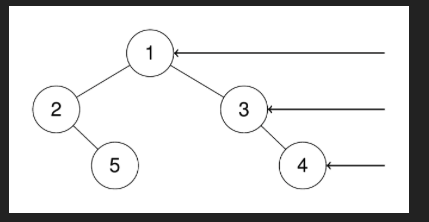

In [366]:
tree.root.right.right.value

4

### Tree Depth

The original function computed depth as the number of nodes along the longest path, so a single node tree would give 1.
In this version we define the height as the number of edges in the path:

An empty tree returns -1.
A tree with one node returns 0.
This adjustment avoids the extra count you observed.

In [352]:
def tree_depth(root):
    """
    Returns the depth (height) of the BST.
    The depth of an empty tree is 0, and a tree with just a root has depth 1.
    """
    if root is None:
        return -1
    return 1 + max(tree_depth(root.left), tree_depth(root.right))


In [353]:
tree_depth(tree.root)

2

In [364]:
def rightSideView(root):
    """
    When performing a breadth-first search (BFS) on a binary tree, we process nodes level by level. In each level, we loop over all nodes in that level using an index variable (here, i). The variable level_length holds the total number of nodes at the current level.

    The condition:

    if i == level_length - 1:
        result.append(node.value)

    means that if the current node is the last node in that level (because i is zero-indexed, the last node is at index level_length - 1), we append its value to the result. This is done because, when looking from the right side, the last node in each level is the one that is visible.
    """
    if not root:
        return []
    
    result = []
    queue = deque([root])
    
    while queue:
        level_length = len(queue)
        # traverse current level
        for i in range(level_length):
            node = queue.popleft()
            # if it's the last node of this level, add its value
            if i == level_length - 1:
                result.append(node.value)
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)
    
    return result

In [367]:
rightSideView(tree.root)

[1, 3, 4]

### In order sucessor

In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def inorderSuccessor(root: TreeNode, p: TreeNode) -> TreeNode:
    successor = None
    while root:
        if p.val < root.val:
            successor = root
            root = root.left
        else:
            root = root.right
    return successor

# Example usage:
if __name__ == "__main__":
    # Constructing a sample BST:
    #         5
    #        / \
    #       3   6
    #      / \
    #     2   4
    #    /
    #   1
    n1 = TreeNode(1)
    n2 = TreeNode(2, n1)
    n4 = TreeNode(4)
    n3 = TreeNode(3, n2, n4)
    n6 = TreeNode(6)
    root = TreeNode(5, n3, n6)
    
    # Let's say p is node n3 with value 3
    p = n3
    successor = inorderSuccessor(root, p)
    print(successor.val if successor else None)  # Expected output: 4

4


In [1]:
def find_strong_friendships(friendships: list[tuple[int, int]]) -> list[tuple[int, int]]:
    # Build a friendship graph where each user maps to a set of their friends.
    friend_graph = {}
    for u, v in friendships:
        friend_graph.setdefault(u, set()).add(v)
        friend_graph.setdefault(v, set()).add(u)
    
    strong_friendships = []
    # For each friendship pair in the original list, check common friends.
    for u, v in friendships:
        common = friend_graph[u] & friend_graph[v]
        if len(common) >= 3:
            strong_friendships.append((u, v))

    
    return strong_friendships

# Example usage:
if __name__ == "__main__":
    # Sample list of friendships represented as tuples (user1, user2)
    friendships = [
        (1, 2),
        (1, 3),
        (1, 4),
        (1, 5),
        (2, 3),
        (2, 4),
        (2, 5),
        (3, 4),
        (3, 5),
        (4, 5),
        (5, 6),
        (2, 6),
        (3, 6),
        (7, 8)
    ]
    
    strong = find_strong_friendships(friendships)
    print("Strong friendships:", strong)

Strong friendships: [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]


## Heap


A heap is a specialized tree-based data structure that satisfies the heap property—every parent node is either less than or equal to (in a min-heap) or greater than or equal to (in a max-heap) its children. In Python, the heapq module provides an efficient implementation of a min-heap using a simple list.

This allows for operations such as heapify, heappush, heappop, and heapreplace, which are useful in building priority queues, efficiently finding the smallest (or largest) element, and scheduling tasks.

heapq.heapify(values)
print("Min-heap:", values)
heapq.heappush(values, 0)
print("After pushing 0:", values)
smallest = heapq.heappop(values)
print("Popped smallest element:", smallest)
print("Heap after pop:", values)

In [193]:
import heapq

def min_meeting_rooms(intervals):
    if not intervals:
        return 0

    intervals.sort(key=lambda x: x[0])
    heap = []
    for interval in intervals:
        if heap and interval[0] >= heap[0]:
            print("replace", interval[1])
            heapq.heapreplace(heap, interval[1])
            print(heap)
        else:
            print("push", interval[1])
            heapq.heappush(heap, interval[1])
    return len(heap), heap

In [194]:
intervals = [[0,30],[5,10],[15,20]]
min_meeting_rooms(intervals)

push 30
push 10
replace 20
[20, 30]


(2, [20, 30])

In [ ]:
# Creating a dictionary
my_dict = {"name": "Alice", "age": 25, "city": "New York"}
print("Dictionary:", my_dict)

# Accessing elements
print("Name:", my_dict["name"])

# Modifying elements
my_dict["age"] = 26
print("Modified dictionary:", my_dict)

## Linked List

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

# Creating a linked list
ll = LinkedList()
ll.append(1)
ll.append(2)
ll.append(3)
print("Linked List:")
ll.print_list()